In [1]:
# Importing the libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

2024-01-12 16:32:37.230743: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-12 16:32:37.257825: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-12 16:32:37.676020: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Fetching the data

In [4]:
df_diab = pd.read_csv('diabetes.csv')
df_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Summarising the data

In [6]:
df_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df_diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df_diab.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
# Checking for null/missing values

In [10]:
df_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# Checking for "0" values

In [12]:
for val in df_diab.columns:
    print(val, "has ", df_diab[df_diab[val] == 0].count()[0], "zeros")

Pregnancies has  111 zeros
Glucose has  5 zeros
BloodPressure has  35 zeros
SkinThickness has  227 zeros
Insulin has  374 zeros
BMI has  11 zeros
DiabetesPedigreeFunction has  0 zeros
Age has  0 zeros
Outcome has  500 zeros


/tmp/ipykernel_55114/1469256286.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(val, "has ", df_diab[df_diab[val] == 0].count()[0], "zeros")
/tmp/ipykernel_55114/1469256286.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(val, "has ", df_diab[df_diab[val] == 0].count()[0], "zeros")
/tmp/ipykernel_55114/1469256286.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(val, "has ", df_diab[df_diab[val] == 0].coun

In [13]:
# Now, we have to impute Zeros with Mean for Glucose, BloodPressure, SkinThickness, Insulin, BMI

In [14]:
# Here, We have to separate the DataFrame into 2 groups on the basis of Outcome value

In [15]:
pstv_diab = df_diab[df_diab['Outcome'] == 1]
ngtv_diab = df_diab[df_diab['Outcome'] == 0]

In [16]:
# The reason for 
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for value in columns:
    pstv_mean = pstv_diab[value].mean()
    ngtv_mean = ngtv_diab[value].mean()
    print(value, "has ", pstv_diab[pstv_diab[value] == 0].count()[0], "zeros in +ve DataFrame")
    print(value, "has ", ngtv_diab[ngtv_diab[value] == 0].count()[0], "zeros in -ve DataFrame")
    print("Mean value for ", value, "in the original DataFrame", df_diab[value].mean())
    print("Mean value for ", value, "in the positive DataFrame", pstv_mean)
    print("Mean value for ", value, "in the negative DataFrame", ngtv_mean)
    print("Percentage Difference b/w +ve & -ve DataFrame for", value, "is : ", 
          ((pstv_mean - ngtv_mean) / ngtv_mean) * 100, "%")
    pstv_diab[value] = pstv_diab[value].replace(0, pstv_mean)
    ngtv_diab[value] = ngtv_diab[value].replace(0, ngtv_mean)
    print("After Imputation")
    print(value, "has ", pstv_diab[pstv_diab[value] == 0].count()[0], "zeros in +ve DataFrame")
    print(value, "has ", ngtv_diab[ngtv_diab[value] == 0].count()[0], "zeros in -ve DataFrame")
    print()

Glucose has  2 zeros in +ve DataFrame
Glucose has  3 zeros in -ve DataFrame
Mean value for  Glucose in the original DataFrame 120.89453125
Mean value for  Glucose in the positive DataFrame 141.25746268656715
Mean value for  Glucose in the negative DataFrame 109.98
Percentage Difference b/w +ve & -ve DataFrame for Glucose is :  28.439227756471308 %
After Imputation
Glucose has  0 zeros in +ve DataFrame
Glucose has  0 zeros in -ve DataFrame

BloodPressure has  16 zeros in +ve DataFrame
BloodPressure has  19 zeros in -ve DataFrame
Mean value for  BloodPressure in the original DataFrame 69.10546875
Mean value for  BloodPressure in the positive DataFrame 70.82462686567165
Mean value for  BloodPressure in the negative DataFrame 68.184
Percentage Difference b/w +ve & -ve DataFrame for BloodPressure is :  3.872795473529932 %
After Imputation
BloodPressure has  0 zeros in +ve DataFrame
BloodPressure has  0 zeros in -ve DataFrame

SkinThickness has  88 zeros in +ve DataFrame
SkinThickness has  1

/tmp/ipykernel_55114/733765806.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(value, "has ", pstv_diab[pstv_diab[value] == 0].count()[0], "zeros in +ve DataFrame")
/tmp/ipykernel_55114/733765806.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(value, "has ", ngtv_diab[ngtv_diab[value] == 0].count()[0], "zeros in -ve DataFrame")
/tmp/ipykernel_55114/733765806.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [17]:
df_diab = pd.concat([pstv_diab, ngtv_diab], axis=0)

In [18]:
df_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,100.335821,33.6,0.627,50,1
2,8,183.0,64.0,22.164179,100.335821,23.3,0.672,32,1
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
6,3,78.0,50.0,32.000000,88.000000,31.0,0.248,26,1
8,2,197.0,70.0,45.000000,543.000000,30.5,0.158,53,1


In [19]:
df_diab.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
762,9,89.0,62.0,19.664,68.792,22.5,0.142,33,0
763,10,101.0,76.0,48.000,180.000,32.9,0.171,63,0
764,2,122.0,70.0,27.000,68.792,36.8,0.340,27,0
765,5,121.0,72.0,23.000,112.000,26.2,0.245,30,0
767,1,93.0,70.0,31.000,68.792,30.4,0.315,23,0


In [20]:
# Randomly shuffling the DataFrame

In [21]:
df_diab = df_diab.sample(frac=1)

In [22]:
df_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
213,0,140.0,65.0,26.000,130.000,42.6,0.431,24,1
278,5,114.0,74.0,19.664,68.792,24.9,0.744,57,0
73,4,129.0,86.0,20.000,270.000,35.1,0.231,23,0
311,0,106.0,70.0,37.000,148.000,39.4,0.605,22,0
699,4,118.0,70.0,19.664,68.792,44.5,0.904,26,0


In [23]:
# Checking the correlation

In [24]:
df_diab.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129898,0.209331,0.018064,-0.002905,0.024268,-0.033523,0.544341,0.221898
Glucose,0.129898,1.000000,0.223775,0.179765,0.431817,0.235818,0.138162,0.268613,0.495906
BloodPressure,0.209331,0.223775,1.000000,0.138042,0.020926,0.285223,0.000679,0.326812,0.168405
SkinThickness,0.018064,0.179765,0.138042,1.000000,0.250078,0.548632,0.156370,0.029980,0.213398
Insulin,-0.002905,0.431817,0.020926,0.250078,1.000000,0.217966,0.168235,0.051208,0.258666
BMI,0.024268,0.235818,0.285223,0.548632,0.217966,1.000000,0.152558,0.027929,0.315760
DiabetesPedigreeFunction,-0.033523,0.138162,0.000679,0.156370,0.168235,0.152558,1.000000,0.033561,0.173844
Age,0.544341,0.268613,0.326812,0.029980,0.051208,0.027929,0.033561,1.000000,0.238356
Outcome,0.221898,0.495906,0.168405,0.213398,0.258666,0.315760,0.173844,0.238356,1.000000


In [25]:
df_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
213,0,140.0,65.0,26.000,130.000,42.6,0.431,24,1
278,5,114.0,74.0,19.664,68.792,24.9,0.744,57,0
73,4,129.0,86.0,20.000,270.000,35.1,0.231,23,0
311,0,106.0,70.0,37.000,148.000,39.4,0.605,22,0
699,4,118.0,70.0,19.664,68.792,44.5,0.904,26,0


In [26]:
# Apply normalization techniques 
X = df_diab.iloc[:, :-1].values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y = df_diab['Outcome']
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)

In [27]:
import joblib
joblib.dump(scaler, 'scaler.gz')

['scaler.gz']

In [28]:
y_scaled.shape

(768, 1)

In [29]:
X_scaled.shape

(768, 8)

In [30]:
# Splitting the Data for Testing/Training

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 42)

In [32]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(units=256, activation='relu', input_shape=(8, )),
                                   tf.keras.layers.Dense(units=128, activation='relu'),
                                   tf.keras.layers.Dense(units=64, activation='relu'),
                                   tf.keras.layers.Dense(1, activation='sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 43521 (170.00 KB)
Trainable params: 43521 (170.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-01-12 16:32:38.470838: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-12 16:32:38.487217: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-12 16:32:38.487336: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [33]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [34]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_data=(X_test, y_test))

Epoch 1/100


2024-01-12 16:32:38.984361: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-01-12 16:32:38.997593: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fcf30d29d90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-12 16:32:38.997611: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-01-12 16:32:39.000167: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-12 16:32:39.008139: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-01-12 16:32:39.040644: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-12 16:

13/13 [==============================] - 1s 8ms/step - loss: 0.2436 - val_loss: 0.2410
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2305 - val_loss: 0.2295
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2143 - val_loss: 0.2089
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1897 - val_loss: 0.1783
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1738 - val_loss: 0.1623
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1596 - val_loss: 0.1636
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1620 - val_loss: 0.1673
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1501 - val_loss: 0.1482
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1499 - val_loss: 0.1473
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1479 - val_loss: 0.1471
Epoch 11/100
13/13 [=

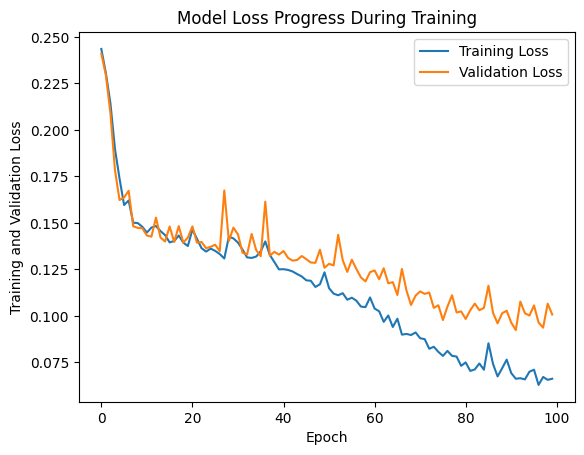

In [35]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [36]:
y_predict = model.predict(X_test)
y_predict_orig = scaler.inverse_transform(y_predict)
y_prd = y_predict_orig > 0.5
y_prd.astype(int)
y_test_orig = scaler.inverse_transform(y_test)

from sklearn.metrics import classification_report
print(classification_report(y_prd , y_test_orig))

from sklearn import metrics
print("ANN model accuracy(in %):",
      metrics.accuracy_score(y_test_orig, y_prd)*100)


5/5 [==============================] - 0s 920us/step
              precision    recall  f1-score   support

       False       0.92      0.85      0.88       103
        True       0.74      0.84      0.79        51

    accuracy                           0.85       154
   macro avg       0.83      0.85      0.84       154
weighted avg       0.86      0.85      0.85       154

ANN model accuracy(in %): 85.06493506493507


In [37]:
# Importing the Keras Tuner for HyperParameter Tuning
import keras_tuner
from keras import layers
def build_model(hp):
    model = keras.Sequential()
    counter = 0

    for i in range(hp.Int('num_layers', min_value=1, max_value=5)):
        dropout_fraction = hp.Choice('rate', values=[0.1, 0.2, 0.3, 0.4, 0.5])
        if counter == 0:
            model.add(layers.Dense(units=hp.Int("units" + str(i), min_value=32, max_value=512, step=32),
                                   activation=hp.Choice("activation" + str(i), ["relu", "tanh", "sigmoid"]),
                                   input_dim=8))
            model.add(layers.Dropout(rate=dropout_fraction))

        else:
            model.add(layers.Dense(units=hp.Int("units" + str(i), min_value=32, max_value=512, step=32),
                                   activation=hp.Choice("activation" + str(i), ["relu", "tanh", "sigmoid"])))
            model.add(layers.Dropout(rate=dropout_fraction))
        counter += 1

    model.add(layers.Dense(1, activation="sigmoid"))
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.mean_squared_error,
    )
    return model

# Using the RandomSearch to search for the best set of parameters for the model
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective=keras_tuner.Objective("val_loss", direction="min"),
    max_trials=100,
    executions_per_trial=3,
    overwrite=True,
    directory="random_search",
    project_name="diabetes_classification",
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Trial 100 Complete [00h 00m 06s]
val_loss: 0.23670916755994162

Best val_loss So Far: 0.13635949790477753
Total elapsed time: 00h 07m 12s


In [41]:
# Fetching the best set of parameters
tuner.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'rate': 0.2,
 'units0': 96,
 'activation0': 'relu',
 'learning_rate': 0.01,
 'units1': 448,
 'activation1': 'relu',
 'units2': 416,
 'activation2': 'tanh',
 'units3': 64,
 'activation3': 'sigmoid',
 'units4': 64,
 'activation4': 'relu'}

In [42]:
# Fetching the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Fitting the model and predicting the output
best_model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test, y_test))

Epoch 1/100
13/13 [==============================] - 1s 8ms/step - loss: 0.1448 - val_loss: 0.1398
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1408 - val_loss: 0.1311
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1537 - val_loss: 0.1477
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1403 - val_loss: 0.1443
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1376 - val_loss: 0.1290
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1409 - val_loss: 0.1332
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1426 - val_loss: 0.1269
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1382 - val_loss: 0.1306
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1378 - val_loss: 0.1230
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1447 - val_loss: 0.1254
Epoch 11/

In [43]:
y_predict = best_model.predict(X_test)
y_predict_orig = scaler.inverse_transform(y_predict)
y_prd = y_predict_orig > 0.5
y_prd.astype(int)
y_test_orig = scaler.inverse_transform(y_test)
from sklearn.metrics import classification_report

print(classification_report(y_prd, y_test_orig))
from sklearn import metrics

print("ANN model accuracy(in %):",
      metrics.accuracy_score(y_test_orig, y_prd) * 100)

# Saving the best found model
model.save('diabetes_prediction.keras')

5/5 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

       False       0.90      0.89      0.89        97
        True       0.81      0.82      0.82        57

    accuracy                           0.86       154
   macro avg       0.85      0.86      0.85       154
weighted avg       0.86      0.86      0.86       154

ANN model accuracy(in %): 86.36363636363636
